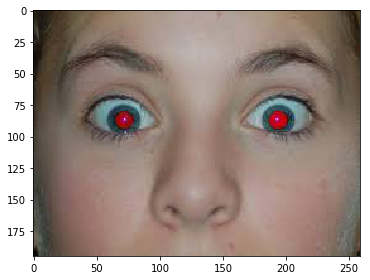

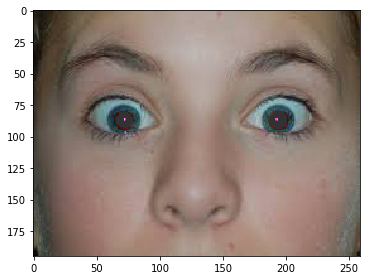

In [2]:
from skimage import io
import matplotlib.pyplot as plt
import math

def distance(clr1,clr2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((clr1[i]-clr2[i]),2)
    return math.sqrt(dif)

def removeRedEyes(image,SX,EX,SY,EY,redEye):
    rows,cols,dims = image.shape
    for i in range(0,rows):
        for j in range(0,cols):
            if(SX <= i <= EX) and (SY <= j <= EY):
                if distance(redEye,image[i,j]) < 150:
                    image[i,j,0] = 50
                    image[i,j,1] = 50
                    image[i,j,2] = 50
    return image

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/red_eye2.jpg')
io.imshow(img)

redEye = [250,0,0]
img2 = removeRedEyes(img, 70,100,50,220,redEye)
plt.figure()
io.imshow(img2)
io.show()

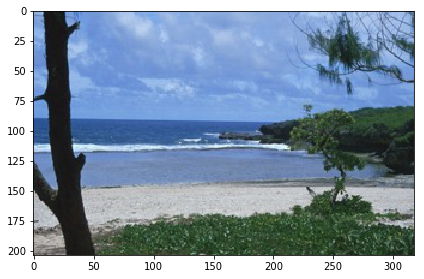

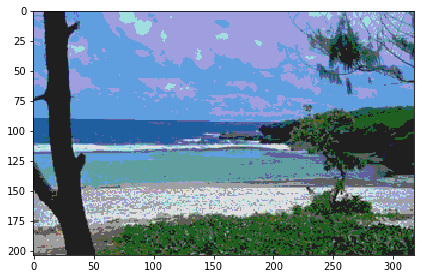

In [3]:
from skimage import io
import matplotlib.pyplot as plt
import math

def posterize(image):
    rows,cols,dims = image.shape
    for i in range(0,rows):
        for j in range(0,cols):
            red = image[i,j,0]
            if red < 64:
                image[i,j,0] = 31
            if red > 63 and red < 128:
                image[i,j,0] = 95
            if red > 127 and red < 192:
                image[i,j,0] = 159
            if red > 191:
                image[i,j,0] = 223
            
            green = image[i,j,1]
            if green < 64:
                image[i,j,1] = 31
            if green > 63 and green < 128:
                image[i,j,1] = 95
            if green > 127 and green < 192:
                image[i,j,1] = 159
            if green > 191:
                image[i,j,1] = 223
                
            blue = image[i,j,2]
            if blue < 64:
                image[i,j,2] = 31
            if blue > 63 and blue < 128:
                image[i,j,2] = 95
            if blue > 127 and blue < 192:
                image[i,j,2] = 159
            if blue > 191:
                image[i,j,2] = 223
                
    return image

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/scene.jpg')
io.imshow(img)

img2 = posterize(img)
plt.figure()
io.imshow(img2)
io.show()

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import math

def distance(color1,color2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((color1[i] - color2[i]),2)
    return math.sqrt(dif)
def swapBack(image, bg, newbg, thresh):
    rows,cols,dims = image.shape
    ret_img = image
    for i in range(0,rows):
        for j in range(0,cols):
            dif = distance(image[i,j],bg[i,j])
            if dif < thresh:
                for k in range(0,3):
                    ret_img[i,j,k] = newbg[i,j,k]
            else:
                for k in range(0,3):
                    ret_img[i,j,k] = image[i,j,k]
    return ret_img
io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/dog1.jpg')
io.imshow(img)

img2 = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/dog2.jpg')
plt.figure()
io.imshow(img2)

img3 = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/road.jpg')
plt.figure()
io.imshow(img3)

threshold = 200
img4 = swapBack(img,img2,img3,threshold)
io.imshow(img4)
io.show()

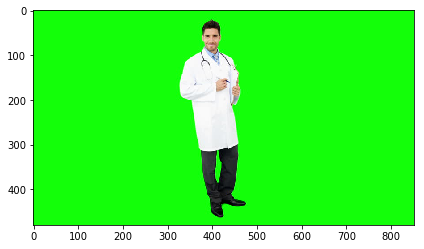

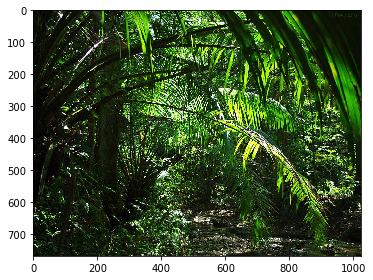

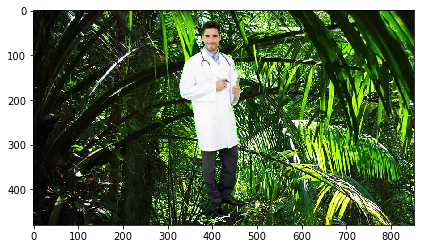

In [11]:
from skimage import io
import matplotlib.pyplot as plt
import math
import numpy as np

def distance(color1, color2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((color1[i]-color2[i]),2)
    return math.sqrt(dif)

def chromakey(img,newbg,thresh,bgcolor):
    rows,cols,dims = img.shape
    ret_img = np.uint8(np.zeros((rows,cols,3)))
    for i in range(0,rows):
        for j in range(0,cols):
            dif = distance(img[i,j],bgcolor)
            if dif < thresh:
                for k in range(0,3):
                    ret_img[i,j,k] = newbg[i,j,k]
            else:
                for k in range(0,3):
                    ret_img[i,j,k] = img[i,j,k]
    return ret_img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/chromakey.jpg')
io.imshow(img)

img2 = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/jungle1.jpg')
plt.figure()
io.imshow(img2)

bgcolor = [0,255,0]
thresh = 100

img3 = chromakey(img,img2,thresh,bgcolor)
plt.figure()
io.imshow(img3)
io.show()